In [68]:
import ast
import pandas as pd
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds

In [69]:
df = pd.read_csv('/Users/kate_fieseler/PycharmProjects/syndirella/nbs/combined_w_fragmenstein_data.csv', index_col=0)
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,BB1_name,BB2_name,BB1_smiles,BB2_smiles,reaction_type,NOTES,syndirella_name,fragmenstein_data
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,EN300-148497,EN300-232319,CCCC(C#N)C(=O)O,Cc1ccc(-n2nc(C(F)(F)F)cc2N)cc1C,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,EN300-185347,Z1263529539,CC1(C(=O)Cl)CC1,Cc1cnccc1N,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,EN300-185347,EN300-110878,CC1(C(=O)Cl)CC1,Cc1nccc(N)c1C,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-96746,EN300-6486464,NC(C(=O)O)C(F)(F)F,CCOC(=O)c1nn(C)c(N)c1Br,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,EN300-128862,EN300-178036,O=C(Cl)C1CCCOC1,Nc1cc(Cl)ncc1C=O,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-72730,EN300-12177685,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,EN300-72730,EN300-12177685,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-148497,EN300-12177685,CCCC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)[nH]n1,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-37468065,EN300-52907,CP(C)(=O)CC(C(=O)O)C(F)(F)F,CC(C)(C)c1cc(N)n(C(C)(C)C)n1,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...


In [70]:
ast.literal_eval(df['fragmenstein_data'][6])[0]

{'Energy': {'bound': {'total_score': 494.5880419883889, 'unit': 'kcal/mol'},
  'unbound': {'total_score': 532.8097637630028, 'unit': 'kcal/mol'},
  'apo': {'total_score': 416.6555005952623, 'unit': 'kcal/mol'},
  'ideal': {'total_score': 116.15426316774047, 'unit': 'kcal/mol'},
  'insitu': {'total_score': 77.93254139312758, 'unit': 'kcal/mol'}},
 'mRMSD': 1.608569593677208,
 'RMSDs': [1.7041712674633211, 2.0345803067084365]}

In [71]:
ast.literal_eval(df['fragmenstein_data'][6])[0]['Energy']['bound']['total_score']

494.5880419883889

In [72]:
# add ∆∆G column
df['bound'] = [ast.literal_eval(df['fragmenstein_data'][i])[0]['Energy']['bound']['total_score'] for i in range(len(df))]
df['unbound'] = [ast.literal_eval(df['fragmenstein_data'][i])[0]['Energy']['unbound']['total_score'] for i in range(len(df))]
df

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,BB1_name,BB2_name,BB1_smiles,BB2_smiles,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,EN300-148497,EN300-232319,CCCC(C#N)C(=O)O,Cc1ccc(-n2nc(C(F)(F)F)cc2N)cc1C,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,EN300-185347,Z1263529539,CC1(C(=O)Cl)CC1,Cc1cnccc1N,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...,404.419806,409.750142
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,EN300-185347,EN300-110878,CC1(C(=O)Cl)CC1,Cc1nccc(N)c1C,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...,415.665091,435.672584
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-96746,EN300-6486464,NC(C(=O)O)C(F)(F)F,CCOC(=O)c1nn(C)c(N)c1Br,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...,582.257486,617.660584
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,EN300-128862,EN300-178036,O=C(Cl)C1CCCOC1,Nc1cc(Cl)ncc1C=O,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...,194.398194,205.065029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-72730,EN300-12177685,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,EN300-72730,EN300-12177685,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-148497,EN300-12177685,CCCC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)[nH]n1,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...,231.283792,337.564366
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,EN300-37468065,EN300-52907,CP(C)(=O)CC(C(=O)O)C(F)(F)F,CC(C)(C)c1cc(N)n(C(C)(C)C)n1,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...,411.078180,418.657099


In [73]:
df['∆∆G'] = df['bound'] - df['unbound']
df

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,BB2_name,BB1_smiles,BB2_smiles,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,EN300-232319,CCCC(C#N)C(=O)O,Cc1ccc(-n2nc(C(F)(F)F)cc2N)cc1C,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752,-130.076493
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Z1263529539,CC1(C(=O)Cl)CC1,Cc1cnccc1N,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...,404.419806,409.750142,-5.330336
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,EN300-110878,CC1(C(=O)Cl)CC1,Cc1nccc(N)c1C,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...,415.665091,435.672584,-20.007492
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,EN300-6486464,NC(C(=O)O)C(F)(F)F,CCOC(=O)c1nn(C)c(N)c1Br,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...,582.257486,617.660584,-35.403098
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,...,EN300-178036,O=C(Cl)C1CCCOC1,Nc1cc(Cl)ncc1C=O,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...,194.398194,205.065029,-10.666835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,EN300-12177685,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,...,EN300-12177685,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,EN300-12177685,CCCC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)[nH]n1,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...,231.283792,337.564366,-106.280574
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,EN300-52907,CP(C)(=O)CC(C(=O)O)C(F)(F)F,CC(C)(C)c1cc(N)n(C(C)(C)C)n1,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...,411.078180,418.657099,-7.578919


In [74]:
# calculate num rotatable bonds
df['num_rot_bonds'] = [CalcNumRotatableBonds(Chem.MolFromSmiles(smiles)) for smiles in df['smiles']]
df

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,BB1_smiles,BB2_smiles,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,CCCC(C#N)C(=O)O,Cc1ccc(-n2nc(C(F)(F)F)cc2N)cc1C,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752,-130.076493,5
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,CC1(C(=O)Cl)CC1,Cc1cnccc1N,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...,404.419806,409.750142,-5.330336,2
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,CC1(C(=O)Cl)CC1,Cc1nccc(N)c1C,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...,415.665091,435.672584,-20.007492,2
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,NC(C(=O)O)C(F)(F)F,CCOC(=O)c1nn(C)c(N)c1Br,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...,582.257486,617.660584,-35.403098,4
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,...,O=C(Cl)C1CCCOC1,Nc1cc(Cl)ncc1C=O,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...,194.398194,205.065029,-10.666835,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,...,CC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CCCC(C#N)C(=O)O,CC(N)C(=O)Nc1cc(C(F)(F)F)[nH]n1,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...,231.283792,337.564366,-106.280574,6
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CP(C)(=O)CC(C(=O)O)C(F)(F)F,CC(C)(C)c1cc(N)n(C(C)(C)C)n1,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...,411.078180,418.657099,-7.578919,4


In [75]:
# add rmsd column
df['rmsd'] = [ast.literal_eval(df['fragmenstein_data'][i])[0]['mRMSD'] for i in range(len(df))]
df

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,BB2_smiles,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds,rmsd
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Cc1ccc(-n2nc(C(F)(F)F)cc2N)cc1C,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752,-130.076493,5,1.758463
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Cc1cnccc1N,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...,404.419806,409.750142,-5.330336,2,0.686535
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Cc1nccc(N)c1C,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...,415.665091,435.672584,-20.007492,2,0.689887
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CCOC(=O)c1nn(C)c(N)c1Br,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...,582.257486,617.660584,-35.403098,4,0.411886
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,...,Nc1cc(Cl)ncc1C=O,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...,194.398194,205.065029,-10.666835,3,0.794516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3,0.815056
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,...,CC(N)C(=O)Nc1cc(C(F)(F)F)n[nH]1,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3,0.815056
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CC(N)C(=O)Nc1cc(C(F)(F)F)[nH]n1,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...,231.283792,337.564366,-106.280574,6,1.063534
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,CC(C)(C)c1cc(N)n(C(C)(C)C)n1,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...,411.078180,418.657099,-7.578919,4,0.790484


In [76]:
df['∆∆G_rot_bond'] = df['∆∆G'] + df['num_rot_bonds']
df

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds,rmsd,∆∆G_rot_bond
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752,-130.076493,5,1.758463,-125.076493
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...,404.419806,409.750142,-5.330336,2,0.686535,-3.330336
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...,415.665091,435.672584,-20.007492,2,0.689887,-18.007492
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...,582.257486,617.660584,-35.403098,4,0.411886,-31.403098
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...,194.398194,205.065029,-10.666835,3,0.794516,-7.666835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3,0.815056,-32.333486
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,...,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3,0.815056,-32.333486
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...,231.283792,337.564366,-106.280574,6,1.063534,-100.280574
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...,411.078180,418.657099,-7.578919,4,0.790484,-3.578919


In [77]:
reject = df[df['ACTION'] == 'REJECT']
reject

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds,rmsd,∆∆G_rot_bond
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752,-130.076493,5,1.758463,-125.076493
10,Cc1cnc(Br)cc1NC(=O)[C@H]1CCC[C@@H](C)C1,BBS_AMU_007D,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,True,False,True,False,False,REJECT,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-02014,[{'Energy': {'bound': {'total_score': 394.8137...,394.813798,404.115482,-9.301684,2,0.492575,-7.301684
15,Cn1cc(NC(=O)/C(C#N)=C\c2ccc3c(c2)OCO3)c(C(F)(F...,BBS_AMU_011A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z3585809468-1-of-1-step-04160,[{'Energy': {'bound': {'total_score': 616.0764...,616.076403,620.977793,-4.901390,4,4.004841,-0.901390
18,CCOc1ccc(/C=C(\C#N)C(=O)Nc2c(C(F)F)nn(C)c2C)cc1,BBS_AMU_013A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z3585809468-1-of-1-step-03877,[{'Energy': {'bound': {'total_score': 554.8786...,554.878608,581.099092,-26.220484,6,4.045150,-20.220484
21,CC(C)(C)n1nc(-c2ccc(F)cc2)cc1NC(=O)C(F)(F)C(F)...,BBS_AMU_015A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z1864315293-1-of-1-step-01543,[{'Energy': {'bound': {'total_score': 631.5986...,631.598661,647.026425,-15.427764,4,2.297622,-11.427764
25,Cc1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)n(CCC#N)n1,BBS_AMU_018A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-02936,[{'Energy': {'bound': {'total_score': 352.7586...,352.758666,369.207898,-16.449232,6,1.064405,-10.449232
26,Cc1cc(NC(=O)[C@H](CP(C)(C)=O)C(F)(F)F)n(CCC#N)n1,BBS_AMU_018B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-02936,[{'Energy': {'bound': {'total_score': 352.7586...,352.758666,369.207898,-16.449232,6,1.064405,-10.449232
29,N#CC1(C(=O)Nc2cnn([C@@H]3CCS(=O)(=O)C3)c2)CCC(...,BBS_AMU_021A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z1726332759-1-of-1-step-00144,[{'Energy': {'bound': {'total_score': 333.8123...,333.812332,368.623775,-34.811443,3,0.748359,-31.811443
30,Cc1cc(NC(=O)[C@](O)(CN(C)C)C(F)(F)F)n(Cc2ccccn...,BBS_AMU_022A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-05873,[{'Energy': {'bound': {'total_score': 560.6087...,560.608726,569.791839,-9.183112,6,1.295318,-3.183112
31,Cc1cc(NC(=O)[C@@](O)(CN(C)C)C(F)(F)F)n(Cc2cccc...,BBS_AMU_022B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-05873,[{'Energy': {'bound': {'total_score': 560.6087...,560.608726,569.791839,-9.183112,6,1.295318,-3.183112


In [78]:
trim = df[df['ACTION'] == 'TRIM']
trim

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds,rmsd,∆∆G_rot_bond
3,CCOC(=O)c1nn(C)c(NC(=O)[C@@H](N)C(F)(F)F)c1Br,BBS_AMU_004A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-01676,[{'Energy': {'bound': {'total_score': 582.2574...,582.257486,617.660584,-35.403098,4,0.411886,-31.403098
4,O=Cc1cnc(Cl)cc1NC(=O)[C@H]1CCCOC1,BBS_AMU_005A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01219,[{'Energy': {'bound': {'total_score': 194.3981...,194.398194,205.065029,-10.666835,3,0.794516,-7.666835
5,C[C@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1C,BBS_AMU_006A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,NaN,steph-fragnetv2-Z4048800382-1-of-1-step-00003,[{'Energy': {'bound': {'total_score': 494.5880...,494.588042,532.809764,-38.221722,2,1.608570,-36.221722
6,C[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1C,BBS_AMU_006B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,NaN,steph-fragnetv2-Z4048800382-1-of-1-step-00003,[{'Energy': {'bound': {'total_score': 494.5880...,494.588042,532.809764,-38.221722,2,1.608570,-36.221722
7,Cc1cnc(Br)cc1NC(=O)[C@@H]1CCC[C@H](C)C1,BBS_AMU_007A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,False,True,True,False,TRIM,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-02014,[{'Energy': {'bound': {'total_score': 394.8137...,394.813798,404.115482,-9.301684,2,0.492575,-7.301684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C[C@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3,0.815056,-32.333486
129,C[C@@H](N)C(=O)Nc1cc(C(F)(F)F)nn1C(=O)[C@H](C)C#N,BBS_AMU_086B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,True,TRIM,...,Amidation,Trim solvent group and maybe the amide pointin...,steph-fragnetv2-Z2957505129-1-of-1-step-00258,[{'Energy': {'bound': {'total_score': 507.3423...,507.342332,542.675818,-35.333486,3,0.815056,-32.333486
130,CCC[C@H](C#N)C(=O)N[C@H](C)C(=O)Nc1cc(C(F)(F)F...,BBS_AMU_087A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,Trim solvent group,steph-fragnetv2-Z2957505129-1-of-1-step-01783,[{'Energy': {'bound': {'total_score': 231.2837...,231.283792,337.564366,-106.280574,6,1.063534,-100.280574
131,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_087B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,False,True,True,False,TRIM,...,Amidation,Trim solvent group and consider the effects of...,steph-fragnetv2-Z3608273487-1-of-1-step-01281,[{'Energy': {'bound': {'total_score': 411.0781...,411.078180,418.657099,-7.578919,4,0.790484,-3.578919


In [79]:
order = df[df['ACTION'] == 'ORDER']
order

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds,rmsd,∆∆G_rot_bond
1,Cc1cnccc1NC(=O)C1(C)CC1,BBS_AMU_002A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00004,[{'Energy': {'bound': {'total_score': 404.4198...,404.419806,409.750142,-5.330336,2,0.686535,-3.330336
2,Cc1nccc(NC(=O)C2(C)CC2)c1C,BBS_AMU_003A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00039,[{'Energy': {'bound': {'total_score': 415.6650...,415.665091,435.672584,-20.007492,2,0.689887,-18.007492
23,C[C@H](C(=O)Nc1ccncc1C#N)C(C)(C)C,BBS_AMU_017A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01021,[{'Energy': {'bound': {'total_score': 551.7048...,551.704804,558.767046,-7.062242,2,0.511241,-5.062242
24,C[C@@H](C(=O)Nc1ccncc1C#N)C(C)(C)C,BBS_AMU_017B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01021,[{'Energy': {'bound': {'total_score': 551.7048...,551.704804,558.767046,-7.062242,2,0.511241,-5.062242
33,Cc1cnccc1N(N)C(=O)[C@@H]1CCSC1,BBS_AMU_023A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-00298,[{'Energy': {'bound': {'total_score': 479.6885...,479.688589,494.245315,-14.556726,2,0.679647,-12.556726
37,CNC(=O)c1cnccc1NC(=O)[C@@H](C)C(C)C,BBS_AMU_026A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,False,True,False,False,False,ORDER,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-01299,[{'Energy': {'bound': {'total_score': 487.6641...,487.664145,496.690363,-9.026218,4,0.564691,-5.026218
47,Cc1nn(C)c(N(C[C@@H](O)CO)C(=O)[C@H](F)C(F)(F)F...,BBS_AMU_034B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,True,True,False,False,ORDER,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-04598,[{'Energy': {'bound': {'total_score': 487.4194...,487.419431,529.601616,-42.182184,6,0.439366,-36.182184
57,CC(C)(C)c1cc(NC(=O)[C@@H](N)[C@](C)(O)C(F)(F)F...,BBS_AMU_040A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,True,True,False,False,ORDER,...,Amidation,NaN,steph-fragnetv2-Z3608271981-1-of-1-step-00991,[{'Energy': {'bound': {'total_score': 528.1830...,528.183078,580.055196,-51.872117,3,0.620296,-48.872117
58,CC(C)(C)c1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)...,BBS_AMU_040B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,True,True,False,True,ORDER,...,Amidation,NaN,steph-fragnetv2-Z3608273487-1-of-1-step-01682,[{'Energy': {'bound': {'total_score': 442.8524...,442.852430,483.010668,-40.158238,6,0.680758,-34.158238
61,CCCc1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)n(C)n1,BBS_AMU_041B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,False,True,True,False,False,ORDER,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-02741,[{'Energy': {'bound': {'total_score': 486.9263...,486.926325,502.493561,-15.567236,6,0.455039,-9.567236


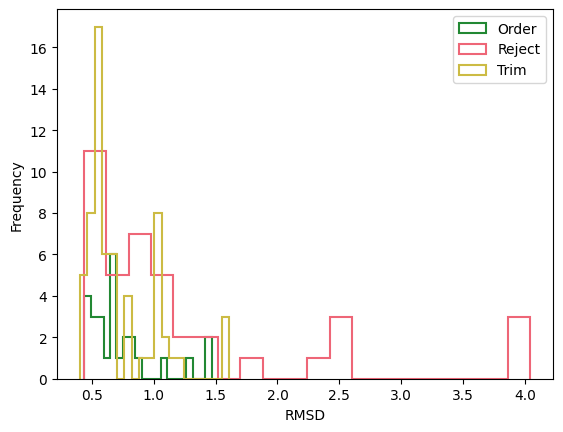

In [80]:
# are the distributions of ∆∆G different for the different actions?
import matplotlib.pyplot as plt

reject_data = reject['rmsd']
trim_data = trim['rmsd']
order_data = order['rmsd']

plt.hist(order_data, histtype='step', bins=20, edgecolor='#228833', linewidth=1.5, facecolor='none', label='Order')
plt.hist(reject_data, histtype='step', bins=20, edgecolor='#EE6677', linewidth=1.5, facecolor='none', label='Reject')
plt.hist(trim_data, histtype='step', bins=20, edgecolor='#CCBB44', linewidth=1.5, facecolor='none', label='Trim')

plt.xlabel('RMSD')
plt.ylabel('Frequency')
plt.legend()

plt.show()

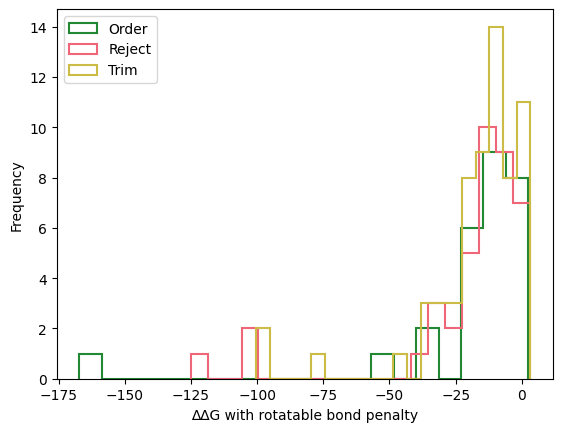

In [81]:
# are the distributions of ∆∆G different for the different actions?
import matplotlib.pyplot as plt

reject_data = reject['∆∆G_rot_bond']
trim_data = trim['∆∆G_rot_bond']
order_data = order['∆∆G_rot_bond']

plt.hist(order_data, histtype='step', bins=20, edgecolor='#228833', linewidth=1.5, facecolor='none', label='Order')
plt.hist(reject_data, histtype='step', bins=20, edgecolor='#EE6677', linewidth=1.5, facecolor='none', label='Reject')
plt.hist(trim_data, histtype='step', bins=20, edgecolor='#CCBB44', linewidth=1.5, facecolor='none', label='Trim')

plt.xlabel('∆∆G with rotatable bond penalty')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [82]:
reject

,smiles,name,inspiration_1,inspiration_2,REJECT,ORDER,SOLVENT,TRIM,CLASH,ACTION,...,reaction_type,NOTES,syndirella_name,fragmenstein_data,bound,unbound,∆∆G,num_rot_bonds,rmsd,∆∆G_rot_bond
0,CCC[C@@H](C#N)C(=O)Nc1cc(C(F)(F)F)nn1-c1ccc(C)...,BBS_AMU_001A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z2957505129-1-of-1-step-02806,[{'Energy': {'bound': {'total_score': 519.5192...,519.519260,649.595752,-130.076493,5,1.758463,-125.076493
10,Cc1cnc(Br)cc1NC(=O)[C@H]1CCC[C@@H](C)C1,BBS_AMU_007D,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0416_0A:Z71580604,True,False,True,False,False,REJECT,...,Amide_Schotten-Baumann_with_amine,NaN,steph-fragnetv2-113738-B1X-1-of-1-step-02014,[{'Energy': {'bound': {'total_score': 394.8137...,394.813798,404.115482,-9.301684,2,0.492575,-7.301684
15,Cn1cc(NC(=O)/C(C#N)=C\c2ccc3c(c2)OCO3)c(C(F)(F...,BBS_AMU_011A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z3585809468-1-of-1-step-04160,[{'Energy': {'bound': {'total_score': 616.0764...,616.076403,620.977793,-4.901390,4,4.004841,-0.901390
18,CCOc1ccc(/C=C(\C#N)C(=O)Nc2c(C(F)F)nn(C)c2C)cc1,BBS_AMU_013A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z3585809468-1-of-1-step-03877,[{'Energy': {'bound': {'total_score': 554.8786...,554.878608,581.099092,-26.220484,6,4.045150,-20.220484
21,CC(C)(C)n1nc(-c2ccc(F)cc2)cc1NC(=O)C(F)(F)C(F)...,BBS_AMU_015A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z1864315293-1-of-1-step-01543,[{'Energy': {'bound': {'total_score': 631.5986...,631.598661,647.026425,-15.427764,4,2.297622,-11.427764
25,Cc1cc(NC(=O)[C@@H](CP(C)(C)=O)C(F)(F)F)n(CCC#N)n1,BBS_AMU_018A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-02936,[{'Energy': {'bound': {'total_score': 352.7586...,352.758666,369.207898,-16.449232,6,1.064405,-10.449232
26,Cc1cc(NC(=O)[C@H](CP(C)(C)=O)C(F)(F)F)n(CCC#N)n1,BBS_AMU_018B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-02936,[{'Energy': {'bound': {'total_score': 352.7586...,352.758666,369.207898,-16.449232,6,1.064405,-10.449232
29,N#CC1(C(=O)Nc2cnn([C@@H]3CCS(=O)(=O)C3)c2)CCC(...,BBS_AMU_021A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z1726332759-1-of-1-step-00144,[{'Energy': {'bound': {'total_score': 333.8123...,333.812332,368.623775,-34.811443,3,0.748359,-31.811443
30,Cc1cc(NC(=O)[C@](O)(CN(C)C)C(F)(F)F)n(Cc2ccccn...,BBS_AMU_022A,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-05873,[{'Energy': {'bound': {'total_score': 560.6087...,560.608726,569.791839,-9.183112,6,1.295318,-3.183112
31,Cc1cc(NC(=O)[C@@](O)(CN(C)C)C(F)(F)F)n(Cc2cccc...,BBS_AMU_022B,A71EV2A-x0310_0A:Z1688504114,A71EV2A-x0556_0A:Z1259207775,True,False,False,False,False,REJECT,...,Amidation,NaN,steph-fragnetv2-Z393051624-1-of-1-step-05873,[{'Energy': {'bound': {'total_score': 560.6087...,560.608726,569.791839,-9.183112,6,1.295318,-3.183112
